In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Dropout , LSTM , GRU , SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint , ReduceLROnPlateau
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

In [2]:
data = pd.read_csv("Ali_Baba_Stock_Data.csv")
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
1,2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2,2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
3,2014-09-24,87.467667,90.570000,90.570000,87.220001,88.470001,32088000
4,2014-09-25,85.874191,88.919998,91.500000,88.500000,91.089996,28598000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2617 non-null   object 
 1   Adj Close  2617 non-null   float64
 2   Close      2617 non-null   float64
 3   High       2617 non-null   float64
 4   Low        2617 non-null   float64
 5   Open       2617 non-null   float64
 6   Volume     2617 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 143.2+ KB


In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
features = ["Close","High","Low","Open","Volume"]
targets = ["Close","High","Low","Open" , "Volume"]
df = data[features]

In [6]:
df

,Close,High,Low,Open,Volume
0,93.889999,99.699997,89.949997,92.699997,271879400
1,89.889999,92.949997,89.500000,92.699997,66657800
2,87.169998,90.480003,86.620003,88.940002,39009800
3,90.570000,90.570000,87.220001,88.470001,32088000
4,88.919998,91.500000,88.500000,91.089996,28598000
...,...,...,...,...,...
2612,103.510002,107.510002,103.000000,104.459999,39538200
2613,111.320000,111.650002,106.699997,107.320000,42429400
2614,112.779999,115.540001,111.000000,113.959999,55001300
2615,118.330002,119.809998,114.964996,115.820000,44024700


In [7]:
df.iloc[0][targets]

Close     9.389000e+01
High      9.970000e+01
Low       8.995000e+01
Open      9.270000e+01
Volume    2.718794e+08
Name: 0, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

x_scale = scaler_x.fit_transform(df[features])
y_scale = scaler_y.fit_transform(df[targets])

In [9]:
n_past = 60
X = []
Y = []
for i in range(n_past , len(df) - 1):
    X.append(x_scale[i-n_past:i])
    Y.append(y_scale[i+1])


In [10]:
X[0]

array([[0.14051972, 0.15747878, 0.13011003, 0.13817329, 1.        ],
       [0.1251203 , 0.13158397, 0.12832227, 0.13817329, 0.23454509],
       [0.11464869, 0.12210842, 0.11688054, 0.12349728, 0.13142097],
       [0.1277382 , 0.12245367, 0.11926423, 0.12166277, 0.10560338],
       [0.12138594, 0.1260214 , 0.12434945, 0.13188914, 0.09258605],
       [0.12731472, 0.12203168, 0.12498511, 0.12658081, 0.05432479],
       [0.12073147, 0.1191161 , 0.12244248, 0.12615146, 0.08029232],
       [0.12111645, 0.1236429 , 0.12419053, 0.12373146, 0.07700031],
       [0.11052935, 0.11620056, 0.1145763 , 0.12256049, 0.0755464 ],
       [0.1142252 , 0.1133617 , 0.11287195, 0.11307571, 0.06599824],
       [0.11822906, 0.12003683, 0.12097255, 0.12021858, 0.05486824],
       [0.11903752, 0.11892431, 0.12260139, 0.12431695, 0.02048868],
       [0.11657362, 0.1191161 , 0.11862857, 0.11963309, 0.03363022],
       [0.11899904, 0.11451259, 0.11862857, 0.11982826, 0.02415965],
       [0.12088547, 0.12160968, 0.

In [11]:
print(f"type x : {type(X)} & type y :{type(Y)}")

type x : <class 'list'> & type y :<class 'list'>


In [12]:
X = np.array(X)
Y = np.array(Y)
print(f"shape x {X.shape} & shape y {Y.shape}")


shape x (2556, 60, 5) & shape y (2556, 5)


In [13]:
x_train , x_test , y_train , y_test = train_test_split(X ,Y , shuffle=False)

In [14]:
print(f"shape x_train {x_train.shape} & shape y_train {y_train.shape}")
print(f"shape x_test {x_test.shape} & shape y_test {y_test.shape}")

shape x_train (1917, 60, 5) & shape y_train (1917, 5)
shape x_test (639, 60, 5) & shape y_test (639, 5)


In [15]:
early_stopping = EarlyStopping(monitor="val_loss" , mode="min" , patience=50)
rrop = ReduceLROnPlateau(monitor="val_loss" , mode="min" , factor=0.5 , learning_rate=1e-6 , patience=25)
check_point = ModelCheckpoint("al.h5", monitor="val_loss" , save_best_only=True)

In [16]:
model = Sequential()
model.add(GRU(64 , return_sequences=True , input_shape=(x_train.shape[1],x_train.shape[2]) , activation='tanh'))
model.add(LSTM(64 , return_sequences=False , activation='tanh'))
model.add(Dense(5))
model.compile(loss='mean_absolute_error' , optimizer='adam')
model.fit(x_train , y_train , batch_size=64 , epochs=1000 , validation_data=(x_test , y_test),callbacks=[early_stopping , rrop , check_point])


Epoch 1/1000
30/30 [==============================] - 4s 58ms/step - loss: 0.0868 - val_loss: 0.0227 - lr: 0.0010
Epoch 2/1000
 3/30 [==>...........................] - ETA: 1s - loss: 0.0255

c:\Users\T A T\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 1s 44ms/step - loss: 0.0254 - val_loss: 0.0174 - lr: 0.0010
Epoch 3/1000
30/30 [==============================] - 1s 42ms/step - loss: 0.0231 - val_loss: 0.0171 - lr: 0.0010
Epoch 4/1000
30/30 [==============================] - 1s 42ms/step - loss: 0.0223 - val_loss: 0.0169 - lr: 0.0010
Epoch 5/1000
30/30 [==============================] - 1s 42ms/step - loss: 0.0217 - val_loss: 0.0160 - lr: 0.0010
Epoch 6/1000
30/30 [==============================] - 1s 45ms/step - loss: 0.0213 - val_loss: 0.0156 - lr: 0.0010
Epoch 7/1000
30/30 [==============================] - 1s 44ms/step - loss: 0.0207 - val_loss: 0.0156 - lr: 0.0010
Epoch 8/1000
30/30 [==============================] - 1s 44ms/step - loss: 0.0198 - val_loss: 0.0152 - lr: 0.0010
Epoch 9/1000
30/30 [==============================] - 1s 40ms/step - loss: 0.0196 - val_loss: 0.0162 - lr: 0.0010
Epoch 10/1000
30/30 [==============================] - 1s 41ms/step - loss: 0.0194 - val_loss: 0.0158

In [17]:
model = load_model("al.h5")

In [18]:
model.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 1s 8ms/step - loss: 0.0118


0.011797602288424969

In [19]:
pred = model.predict(x_test)
print(pred)

20/20 [==============================] - 0s 6ms/step
[[0.1711396  0.17134653 0.17036954 0.17355871 0.05917316]
 [0.16287562 0.16333023 0.16146564 0.16520876 0.07400244]
 [0.1332168  0.13238928 0.12903345 0.1334388  0.11127523]
 ...
 [0.17851785 0.17913623 0.18126345 0.18285693 0.06575167]
 [0.20223865 0.20272912 0.20387667 0.2061541  0.07361196]
 [0.21317238 0.21343838 0.21444437 0.21682663 0.08814106]]


In [20]:
pred_rescale = scaler_y.inverse_transform(pred)
pred_rescale

array([[1.01843513e+02, 1.03314903e+02, 1.00083717e+02, 1.01765747e+02,
        1.96398660e+07],
       [9.96969452e+01, 1.01225296e+02, 9.78425140e+01, 9.96264877e+01,
        2.36156580e+07],
       [9.19930649e+01, 9.31599197e+01, 8.96790085e+01, 9.14870224e+01,
        3.36086480e+07],
       ...,
       [1.03760017e+02, 1.05345444e+02, 1.02825821e+02, 1.04147942e+02,
        2.14035920e+07],
       [1.09921494e+02, 1.11495399e+02, 1.08517799e+02, 1.10116676e+02,
        2.35109680e+07],
       [1.12761528e+02, 1.14286980e+02, 1.11177788e+02, 1.12850983e+02,
        2.74062800e+07]], dtype=float32)

In [21]:
y_test

array([[0.12311839, 0.13645605, 0.12677287, 0.14410617, 0.206735  ],
       [0.12685272, 0.12233858, 0.12236303, 0.12447308, 0.12038458],
       [0.13563042, 0.13894963, 0.12315759, 0.12060889, 0.11434066],
       ...,
       [0.21324349, 0.21824528, 0.21373803, 0.22115535, 0.19106757],
       [0.2346102 , 0.23462614, 0.22949027, 0.2284153 , 0.15012601],
       [0.23926852, 0.23370544, 0.22867586, 0.22650274, 0.10972047]])

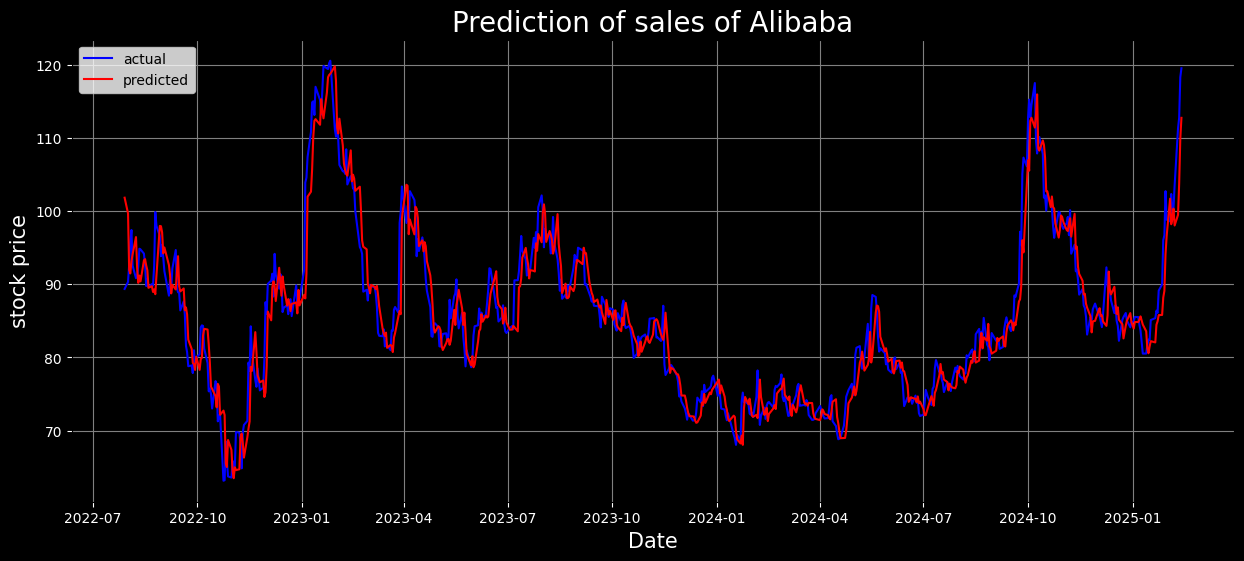

In [22]:
test_date = data["Date"][-len(pred_rescale):]
y_test_rescale = scaler_y.inverse_transform(y_test)
plt.figure(figsize=(15, 6) , facecolor="black")
ax = plt.gca()
ax.set_facecolor("black")
plt.title("Prediction of sales of Alibaba" , color="white" , fontsize=20)
plt.plot(test_date , y_test_rescale[:,0] , label="actual" , color="blue")
plt.plot(test_date , pred_rescale[:,0] , label="predicted" , color="red")
plt.xlabel("Date" , color="white" , fontsize=15)
plt.ylabel("stock price" , color="white" , fontsize=15)
plt.grid(True , color="gray")
plt.tick_params(colors="white")
plt.legend()
plt.show()

In [23]:
data['Close'].mean()

135.15390519981278

In [24]:
data['Close'].std()

58.95155618466899

In [25]:
print(f'mean_absolute_error Model LSTM & GRU(true , prediction) : {mean_absolute_error(y_test_rescale[:,0],  pred_rescale[:,0])}')
print(f'mean_squared_error Model LSTM & GRU(true , prediction) : {mean_squared_error(y_test_rescale[:,0],pred_rescale[:,0])}')


mean_absolute_error Model LSTM & GRU(true , prediction) : 2.494553048461127
mean_squared_error Model LSTM & GRU(true , prediction) : 11.8908186409237


In [26]:
xtprediction = model.predict(x_test)
XTprediction = model.predict(x_train)
final_prediction = np.concatenate([XTprediction,xtprediction],axis=0)
final_prediction_rescale = scaler_y.inverse_transform(final_prediction)

60/60 [==============================] - 0s 6ms/step


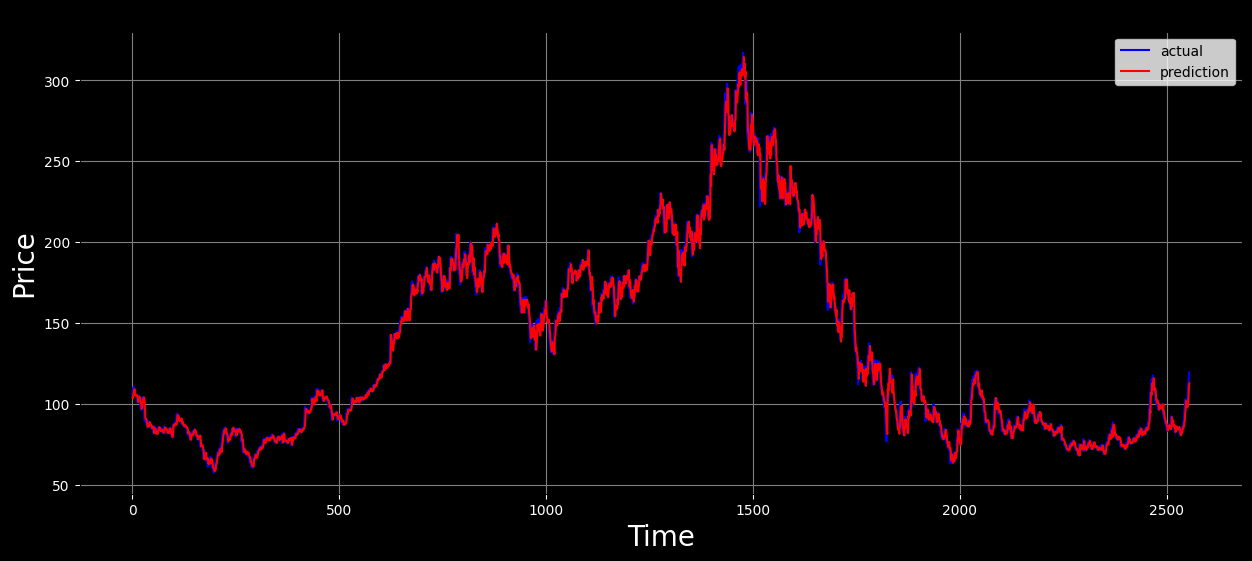

In [27]:
total_y_rescale = scaler_y.inverse_transform(Y)
plt.figure(figsize=(15, 6) , facecolor="black")
ax = plt.gca()
ax.set_facecolor("black")
plt.title("Actual vs Prediction")
plt.plot(total_y_rescale[:,0] , label="actual" , color="blue")
plt.plot(final_prediction_rescale[:,0] , label="prediction" , color="red")
plt.xlabel("Time" , color="white" , fontsize=20)
plt.ylabel("Price" , color="white" , fontsize=20)
plt.grid(True , color="gray")
plt.tick_params(colors="white")
plt.legend()
plt.show()